In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

torch.manual_seed(1)

In [2]:
def load_data(train_size, test_size):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    trainset = datasets.MNIST('data', train=True, download=True, transform=transform)
    train_data = DataLoader(trainset, batch_size=train_size, shuffle=True)

    testset = datasets.MNIST('data', train=False, download=True, transform=transform)
    test_data = DataLoader(testset, batch_size=test_size, shuffle=True)

    return train_data, test_data

In [3]:
class SimpleModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleModel, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 8)
        self.linear3 = nn.Linear(8, output_size)

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [4]:
def calculate_parameters(model):
    return sum(p.numel() for p in model.parameters())

def initialize_optimizer(model):
    return optim.Adam(model.parameters(), lr=0.0001)

def train_model(model, optimizer, train_data):
    model.train()
    for batch_idx, (data, target) in enumerate(train_data):
        data, target = data.view(-1, 784), target
        optimizer.zero_grad()

        output = model(data)
        loss_fn = nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

def evaluate_model(model, loader):
    correct = 0
    total = 0
    cost_total = 0
    cost_counter = 0
    loss_fn = nn.CrossEntropyLoss()

    with torch.no_grad():
        for data, target in loader:
            output = model(data.view(-1, 784))
            cost = loss_fn(output, target)
            cost_total += cost
            cost_counter += 1
            correct += sum(torch.argmax(output, axis=1) == target).item()
            total += len(target)

    return cost_total / cost_counter, correct / total

def train_and_evaluate_models(model, optimizer, train_data, test_data, epochs=8):
    train_loss_arr = []
    test_loss_arr = []
    train_accuracy_arr = []
    test_accuracy_arr = []
    param_arr = []

    for epoch in range(1, epochs + 1):
        train_model(model, optimizer, train_data)

    train_loss, train_acc = evaluate_model(model, train_data)
    test_loss, test_acc = evaluate_model(model, test_data)

    train_loss_arr.append(train_loss)
    test_loss_arr.append(test_loss)
    train_accuracy_arr.append(train_acc)
    test_accuracy_arr.append(test_acc)
    param_arr.append(calculate_parameters(model))

    return train_loss_arr, test_loss_arr, train_accuracy_arr, test_accuracy_arr, param_arr

In [5]:
# Set the batch sizes
train_batch_size = 50
test_batch_size = 100

# Load data
train_data, test_data = load_data(train_batch_size, test_batch_size)

# Initialize models
models = [SimpleModel(784, 5, 10),
          SimpleModel(784, 35, 10),
          SimpleModel(784, 55, 10),
          SimpleModel(784, 75, 10),
          SimpleModel(784, 95, 10),
          SimpleModel(784, 115, 10),
          SimpleModel(784, 135, 10),
          SimpleModel(784, 155, 10),
          SimpleModel(784, 175, 10),
          SimpleModel(784, 195, 10)]

# Initialize lists for storing results
train_loss_arr = []
test_loss_arr = []
train_accuracy_arr = []
test_accuracy_arr = []
param_arr = []

# Train and evaluate models
for i, model in enumerate(models):
    optimizer = initialize_optimizer(model)
    train_loss, test_loss, train_acc, test_acc, param = train_and_evaluate_models(model, optimizer, train_data, test_data)

    train_loss_arr.append(train_loss[0])
    test_loss_arr.append(test_loss[0])
    train_accuracy_arr.append(train_acc)
    test_accuracy_arr.append(test_acc)
    param_arr.append(param[0])

    print(f"Model {i + 1} - Parameters: {param[0]}, Train Loss: {train_loss[0]}, Test Loss: {test_loss[0]}, Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4162850.45it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 617154.46it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4173271.57it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3551552.72it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Model 1 - Parameters: 4063, Train Loss: 0.5431169867515564, Test Loss: 0.5437049269676208, Train Accuracy: [0.84115], Test Accuracy: [0.8385]
Model 2 - Parameters: 27853, Train Loss: 0.20597527921199799, Test Loss: 0.2077762931585312, Train Accuracy: [0.9412], Test Accuracy: [0.9405]
Model 3 - Parameters: 43713, Train Loss: 0.18541647493839264, Test Loss: 0.1961487978696823, Train Accuracy: [0.9474], Test Accuracy: [0.9438]
Model 4 - Parameters: 59573, Train Loss: 0.16576941311359406, Test Loss: 0.16830535233020782, Train Accuracy: [0.9544666666666667], Test Accuracy: [0.9515]
Model 5 - Parameters: 75433, Train Loss: 0.15082573890686035, Test Loss: 0.16216684877872467, Train Accuracy: [0.9575666666666667], Test Accuracy: [0.9532]
Model 6 - Parameters: 91293, Train Loss: 0.13861782848834991, Test Loss: 0.14760921895503998, Train Accuracy: [0.96195], Test Accuracy: [0.9576]
Model 7 - Parameters: 107153, Train Loss: 0.

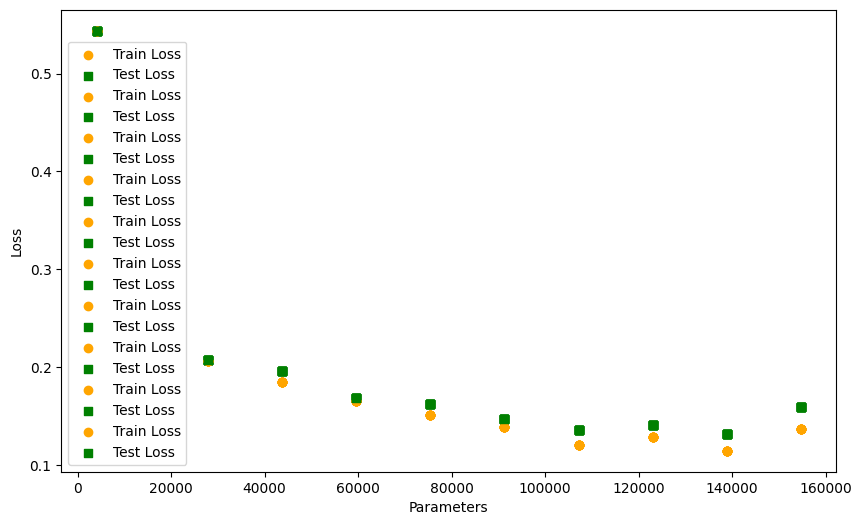

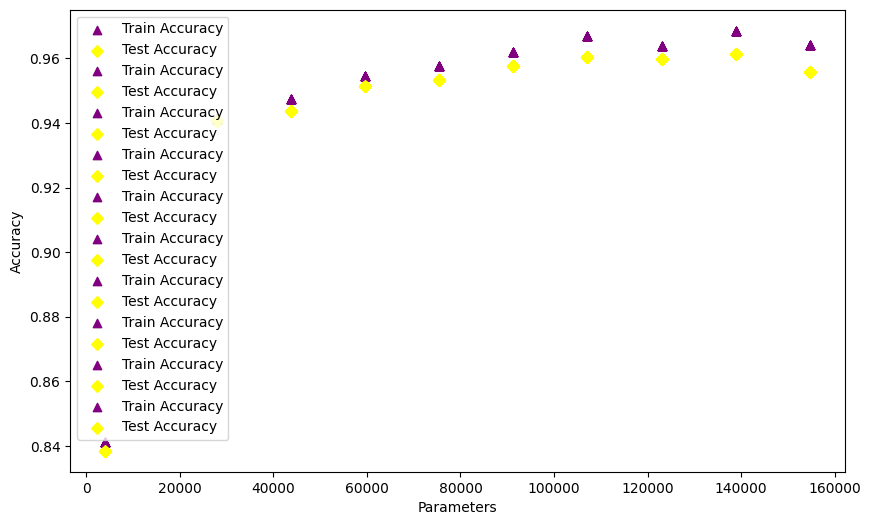

In [6]:
# Plot results
plt.figure(figsize=(10, 6))

for i in range(len(models)):
    plt.scatter(param_arr, train_loss_arr, color="orange", marker='o', label='Train Loss')
    plt.scatter(param_arr, test_loss_arr, color="green", marker='s', label='Test Loss')

plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

for i in range(len(models)):
    plt.scatter(param_arr, train_accuracy_arr, color='purple', marker='^', label='Train Accuracy')
    plt.scatter(param_arr, test_accuracy_arr, color='yellow', marker='D', label='Test Accuracy')

plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()